# LangChain: Q&A over Documents

An example might be a tool that would allow you to query a product catalog for items of interest.

In [1]:
#pip install --upgrade langchain

In [2]:
# import os

# from dotenv import load_dotenv, find_dotenv
# _ = load_dotenv(find_dotenv()) # read local .env file

In [2]:
from langchain.chains import RetrievalQA
# from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import CSVLoader
from langchain.vectorstores import DocArrayInMemorySearch # in memory vector store
from IPython.display import display, Markdown


In [ ]:
from llm_util.gemini_llm import Gemini_llm
llm_obj: Gemini_llm = Gemini_llm()
llm = llm_obj.get_langchain_llm()

## Create document loader

In [8]:
file = 'OutdoorClothingCatalog_1000.csv'
loader = CSVLoader(file_path=file, encoding='utf-8')

In [4]:
from langchain.indexes import VectorstoreIndexCreator

In [8]:
# %pip install docarray

In [5]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from config.config import GEMINI_API_KEY
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001", google_api_key=GEMINI_API_KEY)


##### create index
##### create vectore store using class DocArrayInMemorySearch
##### load list of loaders, here we have only one loader

In [ ]:
index = VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch, embedding=embeddings
).from_loaders([loader])

In [10]:
query ="Please list all your shirts with sun protection \
in a table in markdown and summarize each one."

In [11]:
response = index.query(query, llm=llm)

In [ ]:
display(Markdown(response))

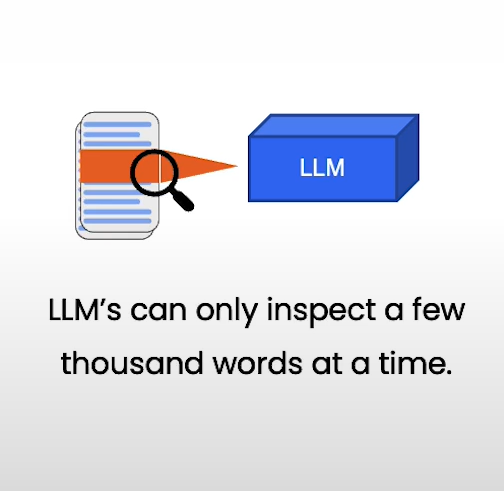

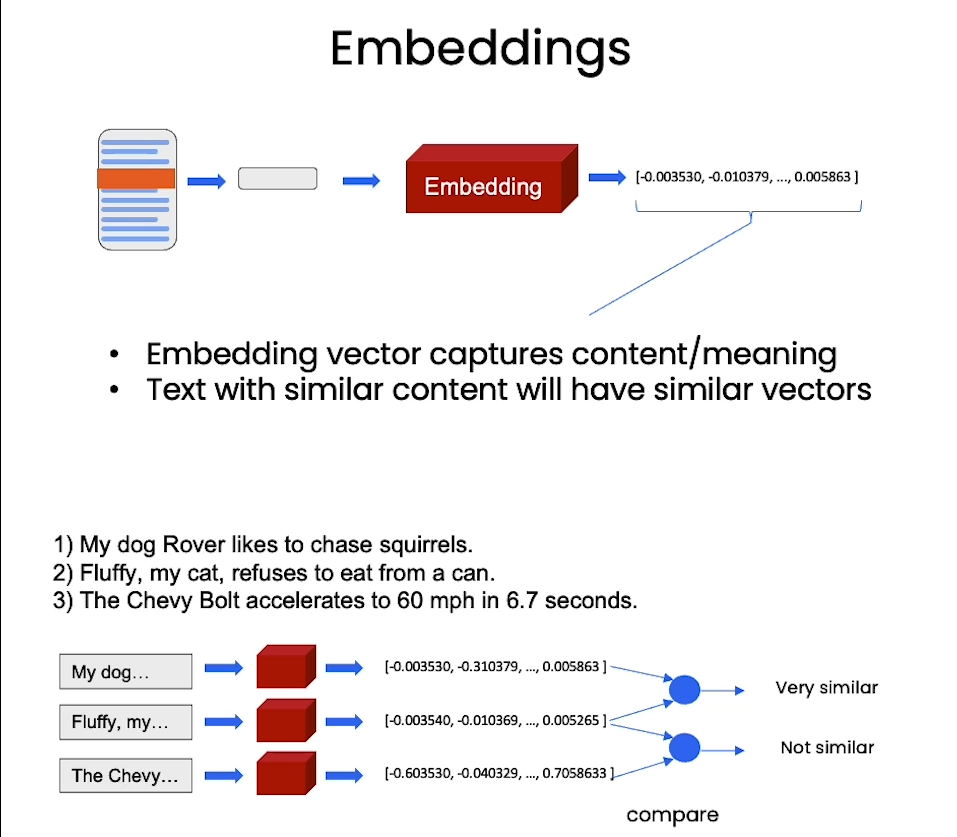

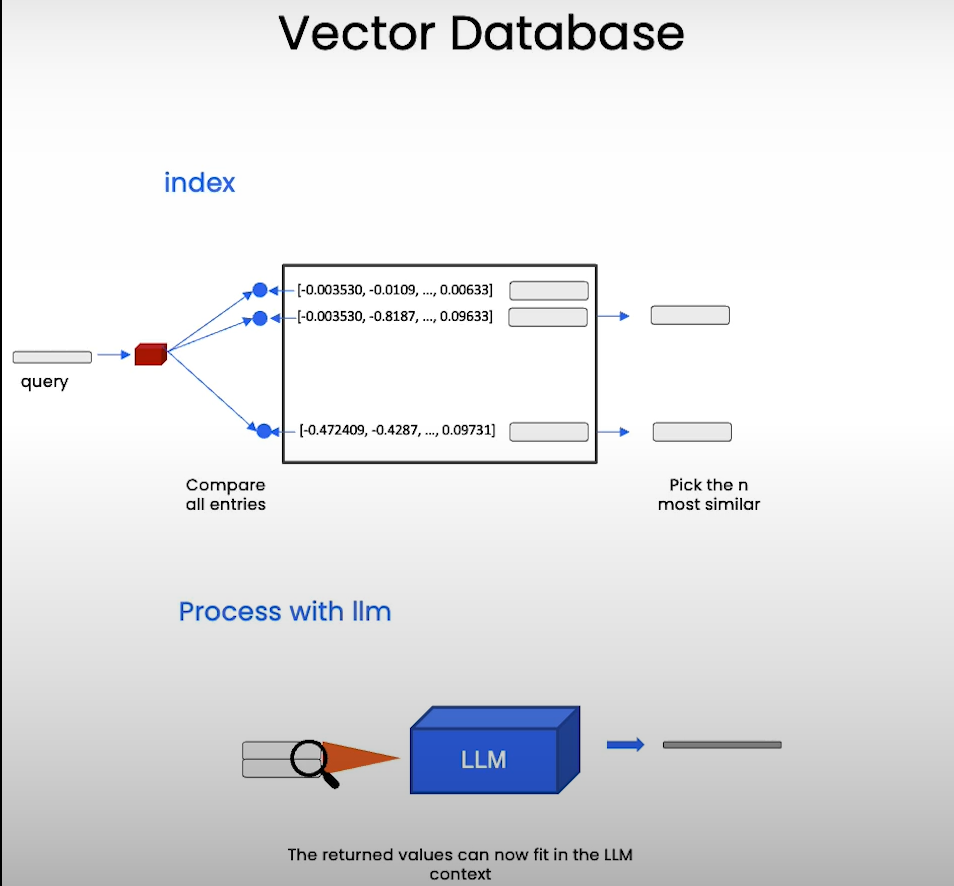

In [11]:
# loader = CSVLoader(file_path=file, encoding='utf-8')

## Create document loader

In [13]:
loader = CSVLoader(file_path=file, encoding='utf-8')

## Load documents

In [14]:
docs = loader.load()

In [ ]:
display(Markdown(docs[0].page_content))

In [ ]:
len(docs)

In [ ]:
type(docs)

In [ ]:
type(docs[0])

## since the documents are small, we don't need to do chunks here. we can directly do embeddings here

In [16]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001", google_api_key=GEMINI_API_KEY)


## Let us see what embeddings do to a particular piece of text

In [17]:
embed = embeddings.embed_query("Hi my name is Nitin")

In [ ]:
len(embed)

In [ ]:
type(embed)

In [ ]:
embed[0]

## create embeddings of the csv document and store into a vector store

In [19]:
db = DocArrayInMemorySearch.from_documents(
    docs, 
    embeddings
)

In [20]:
query = "Please suggest a shirt with sunblocking"

## get documents which are similar to the query

In [21]:
docs = db.similarity_search(query)

In [ ]:
len(docs)

In [ ]:
display(Markdown(docs[0].page_content))

## retreiver -> generic interface

In [24]:
retriever = db.as_retriever()

## LLM used to generate text in natural language

In [25]:
llm = llm_obj.get_langchain_llm()


### Adding all the docs into a single string

In [26]:
qdocs = "".join([docs[i].page_content for i in range(len(docs))])


In [27]:
response = llm.invoke(f"{qdocs} Question: Please list all your \
shirts with sun protection in a table in markdown and summarize each one.") 


In [ ]:
display(Markdown(response.content))

## All the above steps can be done using the below command

In [31]:
qa_stuff = RetrievalQA.from_chain_type(
    llm=llm, # To genrate result in natural language
    chain_type="stuff", # chain type = stuff, which will stuff all the documents into single document  
    retriever=retriever, # To retrieve the documents
    verbose=True
)

In [32]:
query =  "Please list all your shirts with sun protection in a table \
in markdown and summarize each one."

In [ ]:
response = qa_stuff.run(query)

In [ ]:
display(Markdown(response))

## The above result can also be achieved using the below query alone.

In [36]:
response = index.query(query, llm=llm)

In [ ]:
display(Markdown(response))

## Here we can achieve the same result with more flexibility

In [37]:
index = VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch, # we can use our choice of vector store
    embedding=embeddings,# we can use our choice of embedding
).from_loaders([loader])

In [38]:
response = index.query(query, llm=llm)

In [ ]:
display(Markdown(response))

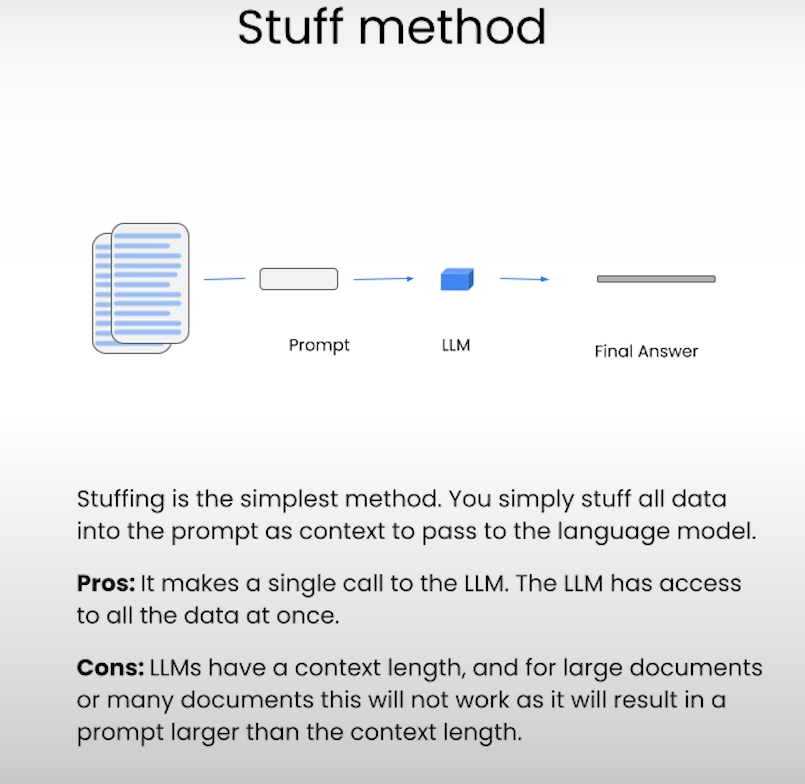

## Above example , the documents were smaller, so stuff was fine for this. but what if we have large number of documents, then there are some other options we can try

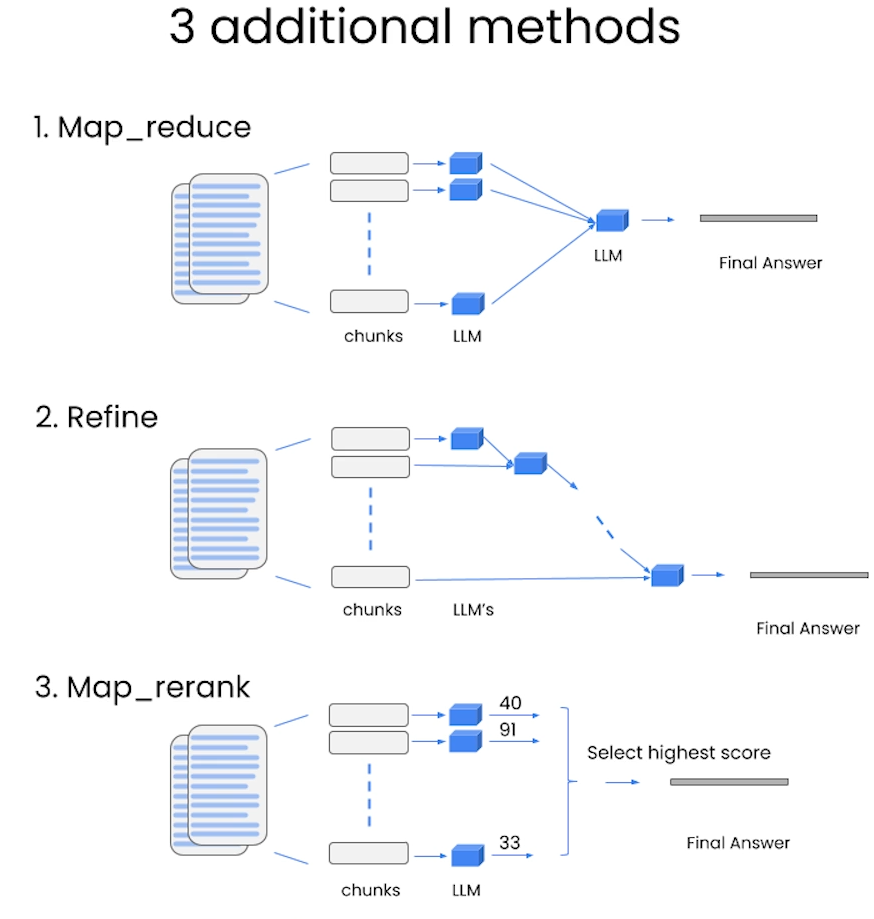